# 넷플릭스 타이틀 EDA 및 추천시스템 만들기

kaggle에 있는 Netflix Movies and TV Shows 데이터 중에서<br>
한국 콘텐츠를 EDA (Exploratory Data Analysis) 해보겠습니다.

## 필요 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## 데이터 확인

8807행 12열을 가지는 데이터프레임입니다.<br>
중간중간 Null 값도 보입니다.

In [2]:
# read_csv 함수로 csv 파일 읽기
raw_df = pd.read_csv('./netflix_titles.csv')
display(raw_df.head())
print(raw_df.info())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


나라별 contents 갯수를 count해서 contents 개수 상위 10개 나라를 뽑아보겠습니다.

In [3]:
# groupby함수로 country를 묶고 집계함수 count()사용. show_id 열만 가져오고 내림차순으로 10개 추출
raw_df.groupby('country').count()['show_id'].sort_values(ascending=False)[:9]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: show_id, dtype: int64

한국은 199개로 5번째로 넷플릭스 contents가 많은 나라입니다.

## 데이터 전처리

date_added는 넷플릭스에 추가된 날짜를 의미합니다.<br>
현재 문자열로 저장되어있는데 날짜형으로 바꾸도록 하겠습니다.

현재 date_added에 있는 데이터가 형태가 일치 하지 않습니다.<br>
예를 들어 'September 25, 2021' 또는 ' September 25, 2021' 등으로 있습니다.<br>
이 경우 날짜형으로 변경시 format이 맞지 않기때문에 모든 공백을 제거하겠습니다.

In [7]:
raw_df['date_added'][:5]

0    September25,2021
1    September24,2021
2    September24,2021
3    September24,2021
4    September24,2021
Name: date_added, dtype: object

In [8]:
# 날짜 형식 통일을 위해 공백 제거
raw_df['date_added'] = raw_df['date_added'].str.replace(' ','')
raw_df['date_added'] = pd.to_datetime(raw_df['date_added'], format='%B%d,%Y')

In [10]:
raw_df['date_added'][:5]

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

위의 데이터프레임으로 한국만 따로 추출하여 새로운 데이터프레임을 만들겠습니다.

In [11]:
# raw_df.country.unique()로 확인해보면
#한국은 South Korea로 되어있습니다.
korea_df = raw_df.query('country=="South Korea"')
print(f'한국 contents 개수 :{len(korea_df)}')

한국 contents 개수 :199


In [69]:
korea_df['title'].unique()

array(['Tayo the Little Bus', 'Pororo - The Little Penguin',
       'The Crowned Clown', 'Her Private Life', 'YooHoo to the Rescue',
       'The 8th Night', 'Hospital Playlist',
       'Love (ft. Marriage and Divorce)', 'Sweet & Sour',
       'Move to Heaven', 'Mine', 'Love Naggers', 'Law School', 'Signal',
       'Night in Paradise', 'Robocar Poli', 'Men on a Mission',
       'Navillera', 'Love Alarm', 'Vincenzo', 'Hello, Me!', 'Sisyphus',
       'Space Sweepers', 'Busted!', 'Wish You',
       'What Happened to Mr. Cha?', 'A Love So Beautiful',
       'Lovestruck in the City', 'Run On', '100 Days My Prince',
       'The Guest', 'The Uncanny Counter', 'The Call',
       'Strongest Deliveryman', 'Graceful Friends', 'The Good Detective',
       'Voice', 'Start-Up', 'Do Do Sol Sol La La Sol', 'Private Lives',
       'Familiar Wife', 'The School Nurse Files', '#Alive',
       'Record of Youth', 'Goedam', 'Stranger', 'The Larva Island Movie',
       'Was It Love?', 'Twogether', "It's Okay t

한국 content의 type 분포는 다음과 같습니다.

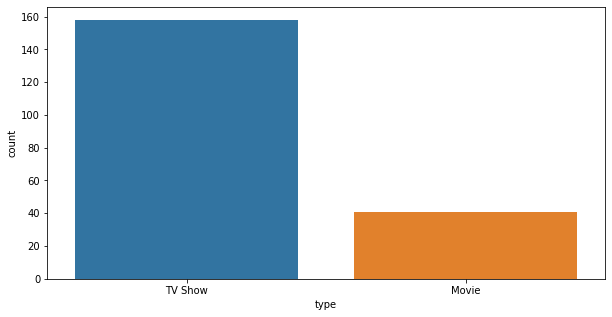

In [12]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x='type',data=korea_df)

## 넷플릭스 한국 영화 시간 분포 확인

In [24]:
korea_movie_df = korea_df.query('type=="Movie"')
korea_movie_df['duration'] = korea_movie_df['duration'].str.replace(' min','')
korea_movie_df['duration'] = korea_movie_df['duration'].astype(int)

<ipython-input-24-2df02826fa1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_movie_df['duration'] = korea_movie_df['duration'].str.replace(' min','')
<ipython-input-24-2df02826fa1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_movie_df['duration'] = korea_movie_df['duration'].astype(int)


<AxesSubplot:xlabel='duration', ylabel='Density'>

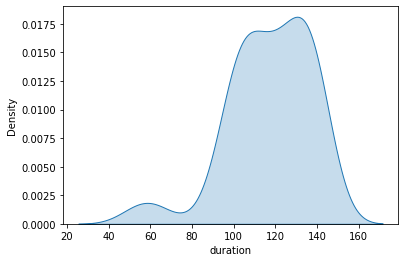

In [25]:
sns.kdeplot(data=korea_movie_df['duration'], shade=True)

## content 기반 추천 시스템

TF-IDF를 이용한 넷플릭스 추천 시스템을 만들어보겠습니다.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# 불용어 제거
tfidf = TfidfVectorizer(stop_words='english')
# NaN값 대체
raw_df['description'] = raw_df['description'].fillna('')
# TF-IDF matrix 생성
tfidf_matrix = tfidf.fit_transform(raw_df['description'])
tfidf_matrix.shape

(8807, 18895)

(문서의 개수, 단어의 개수)

In [48]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
from sklearn.metrics.pairwise import linear_kernel

# 코사인 유사도 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(raw_df.index, index=raw_df['title']).drop_duplicates()

In [59]:
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [67]:
def get_recommend(title, cosine_sim=cosine_sim):
    idx = indices[title]
    similar_score = list(enumerate(cosine_sim[idx]))
    similar_score = sorted(similar_score, key=lambda x : x[1], reverse=True)
    # 유사한 movie 5개 추출
    similar_score = similar_score[1:5]
    # movie index 추출
    movie_indices = [i[0] for i in similar_score]
    # 결과값 리턴
    return raw_df['title'].iloc[movie_indices]

In [72]:
# 응답하라 1997과 유사한 콘텐츠 추출
get_recommend('Reply 1997')

4687    Take My Brother Away
459        Never Have I Ever
2391                   Milea
3547          Back to School
Name: title, dtype: object